In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pickle
import copy
import math

In [5]:
## Load the sensor locations
with open('sensors.pkl', 'rb') as file:
    loc = pickle.load(file) 
    loc = np.array(loc) # sensor locations are stored in loc

In [7]:
def calculate_connectivity(nodes, map):
    
    update_node = []
    output = []
    
    cover_map = copy.deepcopy(map)
    temp_nodes = copy.deepcopy(nodes)
    for node in temp_nodes:
        for temp in temp_nodes:
            if(temp!=node):
                if (node[0] != temp[0]): #2 sensors are at different row
                    #calculate the distance between 2 nodes
                    distance = math.sqrt((temp[1]-node[1])**2 + (temp[0]-node[0])**2)

                    #save in a list
                    update_node.append([node, temp, distance])

                else: #2 sensors at the same row
                    distance = abs(temp[1] - node[1])

                    #save in a list
                    update_node.append([node,temp, distance])
                                
    
    for x in update_node:
        if x not in output:
            output.append(x)
    
    return output

In [1]:
# Create a minimum spanning tree

def spanning_tree(nodes):
    
    length = len(nodes)
    k = 0
    
    #Create an empty adjacency matrix
    adjacencyMatrix = [[0 for column in range(length)] 
                    for row in range(length)]
    
    #Create another adjacency Matrix for the maximum Spanning Tree:
    mstMatrix = [[0 for column in range(length)] 
                    for row in range(length)]
    
    connectivity = calculate_connectivity(nodes,map)
    
    #Fill the values in the adjacency matrix
    for i in range(length):
        for j in range(length):
            if(i!=j):
                adjacencyMatrix[i][j] = connectivity[k][2]
                k = k + 1
                
    #Define a big number to compare
    big_number = float('inf')

    #A list showing which vertices are already selected 
    selectedVertices = [False for vertex in range(length)]


    # While there are vertices that are not included in the MST
    while(False in selectedVertices):

        minimum = big_number

        # The starting vertex (the sink)
        start = 0

        # The ending vertex
        end = 0

        for i in range(0,length):
            # If the vertex is part of the MST, look its relationships
            if selectedVertices[i]:
                #Only need to look at the upper half of the matrix because it's symmetrical
                for j in range(0+i,length):
                    # If the vertex analized have a path to the ending vertex and not included in the MST
                    if (not selectedVertices[j] and adjacencyMatrix[i][j]>0):  
                        # If the weight path analized is less than the minimum of the MST
                        if adjacencyMatrix[i][j] < minimum:
                            # Defines the new minimum weight, the starting vertex and the ending vertex
                            minimum = adjacencyMatrix[i][j]
                            start, end = i, j
        
        # Since we added the ending vertex to the MST, it's already selected:
        selectedVertices[end] = True


        # Filling the MST Adjacency Matrix fields:
        mstMatrix[start][end] = minimum
        
        if minimum == big_number:
            mstMatrix[start][end] = 0
        
        mstMatrix[end][start] = mstMatrix[start][end]
                
    return mstMatrix

In [9]:
#Find the smallest number in the row (except 0)
def find_smallest_number(arr):
    for i in arr:
        if i != 0:
            minimum = i

    for i in arr:
        if i != 0:
            if(minimum > i):
                minimum = i
                
    index = arr.index(minimum)
    
    return index, minimum  

In [6]:
def single_route(nodes):
    # write a function that designs the route of the big sensor in scenario 1
    time = 0
    route = [[150,150]]

    #Search for 5x5 area around the sink
    for i in range(route[-1][0]-2,route[-1][0]+2):
        for j in range(route[-1][1]-2,route[-1][1]+2):
            if [i,j] in nodes and [i,j] != route[-1]:
                #route.append([i,j])
                temp_index = nodes.index([i,j])
                #If there exist node in 5x5 area, we consider it as visited node
                #We will not include it in the route list since we don't need to visit this node
                #Replace it as a temporary value of 150,150 for the convenience of the algorithm.
                nodes[temp_index] = [150,150]

                #Convert list of list to list of tuple
                nodes_tuple = [tuple(x) for x in nodes]

                nodes = sorted(set(nodes_tuple), key=nodes_tuple.index)

                #Convert it back to list
                nodes = [list(x) for x in nodes]

                #Swap [150,150] to the first element in the list
                index_150 = nodes.index([150,150])
                nodes[index_150], nodes[0] = nodes[0], nodes[index_150]

    #Create the first spanning tree
    mst = spanning_tree(nodes)

    #Find the path with smallest distance
    index,minimum = find_smallest_number(mst[0])

    #Add the first distance
    time = time + minimum

    #Add this node to the route list
    route.append(nodes[index])

    #Search for 5x5 area
    for i in range(route[-1][0]-2,route[-1][0]+2):
        for j in range(route[-1][1]-2,route[-1][1]+2):
            if [i,j] in nodes and [i,j] != route[-1]:
                temp_index = nodes.index([i,j])
                nodes[temp_index] = [150,150]

                #Convert list of list to list of tuple
                nodes_tuple = [tuple(x) for x in nodes]

                nodes = sorted(set(nodes_tuple), key=nodes_tuple.index)

                #Convert it back to list
                nodes = [list(x) for x in nodes]

                #Swap [150,150] to the first element in the list
                index_150 = nodes.index([150,150])
                nodes[index_150], nodes[0] = nodes[0], nodes[index_150]

    #Find the last leaf node of this path
    mst[0][index] = 0
    mst[index][mst[index] == minimum] = 0
    mst = np.array(mst, dtype = object)
    while (np.count_nonzero(mst[index]) != 0):
        #Find the smallest number and its index
        mst = mst.tolist()
        index, minimum = find_smallest_number(mst[index])
        #Update time
        time += minimum
        #Update route
        route.append(nodes[index])

        #Search for 5x5 area
        for i in range(route[-1][0]-2,route[-1][0]+3):
            for j in range(route[-1][1]-2,route[-1][1]+3):
                if [i,j] in nodes and [i,j] != route[-1]:
                    temp_index = nodes.index([i,j])
                    nodes[temp_index] = [150,150]

                    #Convert list of list to list of tuple
                    nodes_tuple = [tuple(x) for x in nodes]

                    nodes = sorted(set(nodes_tuple), key=nodes_tuple.index)

                    #Convert it back to list
                    nodes = [list(x) for x in nodes]

                    #Swap [150,150] to the first element in the list
                    index_150 = nodes.index([150,150])
                    nodes[index_150], nodes[0] = nodes[0], nodes[index_150]

        mst = np.array(mst, dtype = object)
        mst[index][mst[index] == minimum] = 0

    #Convert list of list to list of tuple
    nodes_tuple = [tuple(x) for x in nodes]
    route_tuple = [tuple(x) for x in route]

    #Find the complement list
    new_list = list(set(nodes_tuple) - set(route_tuple))

    new_list.insert(0,route[-1])

    nodes = new_list
    nodes = [list(x) for x in nodes]

    mst = spanning_tree(new_list)

    while(len(mst) != 1):
        #Find the path with smallest distance
        index,minimum = find_smallest_number(mst[0])

        #Add the first distance
        time = time + minimum

        #Add this node to the route list
        route.append(nodes[index])

        #Search for 5x5 area
        for i in range(route[-1][0]-2,route[-1][0]+3):
            for j in range(route[-1][1]-2,route[-1][1]+3):
                if [i,j] in nodes and [i,j] != route[-1]:
                    temp_index = nodes.index([i,j])
                    nodes[temp_index] = [150,150]

                    #Convert list of list to list of tuple
                    nodes_tuple = [tuple(x) for x in nodes]

                    nodes = sorted(set(nodes_tuple), key=nodes_tuple.index)

                    #Convert it back to list
                    nodes = [list(x) for x in nodes]

                    #Swap [150,150] to the first element in the list
                    index_150 = nodes.index([150,150])
                    nodes[index_150], nodes[0] = nodes[0], nodes[index_150]

        #Find the last leaf node of this path
        mst[0][index] = 0
        mst[index][mst[index] == minimum] = 0
        mst = np.array(mst, dtype = object)
        while (np.count_nonzero(mst[index]) != 0):
            #Find the smallest number and its index
            mst = mst.tolist()
            index, minimum = find_smallest_number(mst[index])
            #Update time
            time += minimum
            #Update route
            route.append(nodes[index])

            #Search for 5x5 area
            for i in range(route[-1][0]-2,route[-1][0]+3):
                for j in range(route[-1][1]-2,route[-1][1]+3):
                    if [i,j] in nodes and [i,j] != route[-1]:
                        temp_index = nodes.index([i,j])
                        nodes[temp_index] = [150,150]

                        #Convert list of list to list of tuple
                        nodes_tuple = [tuple(x) for x in nodes]

                        nodes = sorted(set(nodes_tuple), key=nodes_tuple.index)

                        #Convert it back to list
                        nodes = [list(x) for x in nodes]

                        #Swap [150,150] to the first element in the list
                        index_150 = nodes.index([150,150])
                        nodes[index_150], nodes[0] = nodes[0], nodes[index_150]

            mst = np.array(mst, dtype = object)
            mst[index][mst[index] == minimum] = 0

        #Convert list of list to list of tuple
        nodes_tuple = [tuple(x) for x in nodes]
        route_tuple = [tuple(x) for x in route]

        #Find the complement list
        new_list = list(set(nodes_tuple) - set(route_tuple))

        new_list.insert(0,route[-1])

        nodes = new_list
        nodes = [list(x) for x in nodes]

        mst = spanning_tree(new_list)

    #To this point, there is only one node in the list, so we will go back to the sink from this node
    last_distance = math.sqrt((nodes[0][1]-150)**2 + (nodes[0][0]-150)**2)

    #Update time
    time = time + last_distance
    route.append([150,150])

    #Convert everything back to list of list
    route = [list(x) for x in route]

    return time, route

# You can choose any data structure you think best to represent nodes, graphs, and any other data types.

In [10]:
len(loc)

1269

In [7]:
loc = loc.tolist()

In [7]:
# Due to the runtime issue, only plot for the first 400 sensors
loc = loc[:400]
loc

array([[150, 150],
       [150, 149],
       [141, 140],
       [141, 149],
       [132, 140],
       [130, 131],
       [131, 149],
       [133, 158],
       [138, 131],
       [147, 131],
       [141, 158],
       [138, 122],
       [133, 167],
       [133, 113],
       [130, 104],
       [137, 104],
       [121,  99],
       [145, 122],
       [142, 167],
       [150, 138],
       [142, 113],
       [129, 176],
       [149, 158],
       [157, 159],
       [129, 122],
       [129,  95],
       [138,  95],
       [145, 104],
       [150, 167],
       [155, 130],
       [120, 181],
       [111, 172],
       [137, 176],
       [129,  86],
       [130,  77],
       [136,  82],
       [145, 176],
       [112, 100],
       [129, 185],
       [134, 189],
       [146,  95],
       [127,  68],
       [136,  73],
       [140, 185],
       [153,  95],
       [112, 108],
       [140, 194],
       [153, 175],
       [149, 185],
       [161, 133],
       [102, 163],
       [158, 168],
       [137,

In [11]:
time, route = single_route(loc)

In [12]:
x = [x for x, y in route]
y = [y for x, y in route]

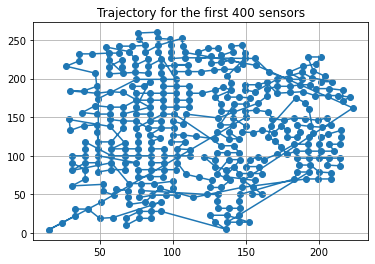

In [16]:
plt.scatter(x,y)
plt.plot(x,y)
plt.title("Trajectory for the first 400 sensors")
plt.grid()
plt.show()

In [14]:
time

5177.483884642448

In [18]:
route

[[150, 150],
 [149, 158],
 [157, 159],
 [165, 157],
 [168, 148],
 [176, 146],
 [183, 149],
 [190, 148],
 [199, 146],
 [205, 149],
 [208, 140],
 [202, 137],
 [194, 138],
 [185, 140],
 [187, 131],
 [185, 124],
 [178, 124],
 [178, 133],
 [174, 138],
 [169, 130],
 [161, 133],
 [155, 130],
 [147, 131],
 [150, 138],
 [141, 149],
 [141, 158],
 [133, 158],
 [133, 167],
 [129, 176],
 [140, 185],
 [134, 189],
 [129, 185],
 [120, 181],
 [111, 181],
 [111, 190],
 [102, 190],
 [93, 190],
 [93, 199],
 [92, 207],
 [92, 216],
 [110, 218],
 [101, 218],
 [101, 209],
 [110, 209],
 [119, 209],
 [128, 211],
 [135, 212],
 [144, 212],
 [148, 219],
 [140, 224],
 [133, 221],
 [126, 220],
 [126, 229],
 [117, 225],
 [117, 234],
 [124, 239],
 [131, 239],
 [133, 230],
 [141, 235],
 [140, 242],
 [147, 243],
 [149, 233],
 [149, 226],
 [137, 203],
 [140, 194],
 [137, 176],
 [145, 176],
 [153, 175],
 [150, 167],
 [142, 167],
 [132, 140],
 [141, 140],
 [138, 131],
 [145, 122],
 [138, 122],
 [130, 131],
 [129, 122],
 [1